# QLS 612 Practical Assessment: P-Hacking

David MacDonald
May 31, 2020

This project examines the relationship between the quantity partY and a variety of measures of physical and intellectual development, including IQ (full, verbal, and performance), height, weight, and MRI voxels classified as brain, as a measure of physical brain size. Significant relationships were found between partY and brain size (MRI voxel counts) as well as performance IQ.

## Methods 
To evaluate the hypothesis that partY is associated with measures of physical and intellectual development and function, a two-stage analytical procedure was used. First, an initial exploration of the data was performed, in order to understand how the data were distributed. To do this, scatter plots were generated between each pair of variables, and, by visual inspection of the data, a number of candidate predictors were selected.

These predictors were then tested in a linear regression model, which predicted partY values from each of the candidates. In addition, candidates were tested together in a multivariate regression model, to determine whether prediction accuracy was increased. The predictors included in this combined model were tested to ensure that they themselves were not correlated.


### Read the data, drop NAs. Add the prescribed variables of random noise.

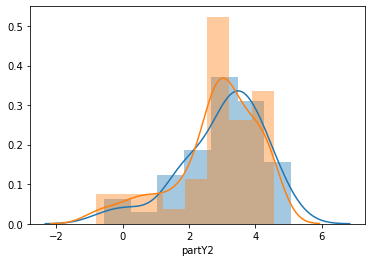

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.formula.api import rlm
from scipy import stats as sst

# Read data. Drop NA.
bs_data = pd.read_csv('brainsize.csv', sep = ';', index_col=0, na_values = '.')
#bs_data = bs_data.dropna()

# Add column of random noise and visualize
np.random.seed(931)
bs_data['partY'] = np.log(np.random.exponential(30,bs_data.shape[0]))
np.random.seed(256)
bs_data['partY2'] = np.log(np.random.exponential(30,bs_data.shape[0]))

sns.distplot(bs_data['partY'])
sns.distplot(bs_data['partY2'])

## Data Exploration
Visualize the relationship between partY and potential predictors. We colour data points by gender, as a gender component might be important.

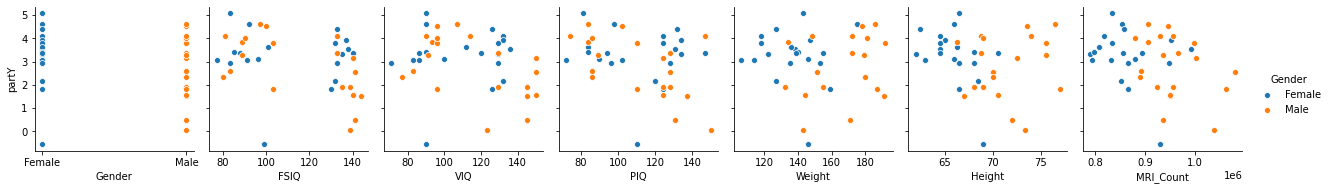

In [83]:
sns.pairplot(bs_data, y_vars = 'partY', x_vars = ['Gender',"FSIQ","VIQ","PIQ","Weight","Height","MRI_Count"], hue = 'Gender')

MRI_Count, Weight, and the IQ measures all seem like candidate predictors, though the associations are not strong. Generate linear models to determine the predictive value.

In [85]:
model = dict()
for idx, feature in enumerate(bs_data.columns[range(0,bs_data.columns.shape[0]-1)]):
    model[feature] = ols('partY ~ ' + feature, bs_data).fit()

for mod in model:
    print("{:9s}: {:6.3f}".format(mod,model[mod].f_pvalue))

Gender   :  0.228
FSIQ     :  0.057
VIQ      :  0.110
PIQ      :  0.030
Weight   :  0.878
Height   :  0.252
MRI_Count:  0.029
partY    :  0.000


In these univariate models, PIQ and MRI_Count both show significance. Examine the full models. First partY ~ PIQ:

In [86]:
full_model = ols('partY ~ PIQ',bs_data).fit()
print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.092
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0299
Time:                        23:41:21   Log-Likelihood:                -62.859
No. Observations:                  40   AIC:                             129.7
Df Residuals:                      38   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1427      0.964      5.334      0.0

Then partY ~ MRI_Count

In [88]:
full_model = ols('partY ~ MRI_Count',bs_data).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.175
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0286
Time:                        23:42:52   Log-Likelihood:                -62.821
No. Observations:                  40   AIC:                             129.6
Df Residuals:                      38   BIC:                             133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4767      2.411      3.516      0.0

Both PIQ and MRI_Count therefore can be used to predict partY. 

There is no significant relationship between PIQ or MRI_Count and partY2, even though it is drawn from the same distribution as partY: 

In [93]:
print(ols('partY2 ~ MRI_Count', bs_data).fit().summary())
print(ols('partY2 ~ PIQ', bs_data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4430
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.510
Time:                        23:48:28   Log-Likelihood:                -66.622
No. Observations:                  40   AIC:                             137.2
Df Residuals:                      38   BIC:                             140.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0507      2.651      0.396      0.6

## Conclusion
Both performance IQ and brain size, as measured by MRI voxel count, are significant predictors of partY values.